# COGS 108 Final Project - Spring 2019


## Group Members and Contributions

### - Abigail Diamse A14135992
Intro & Background, Data Visualization, Conclusion
### - Fangyu Liu A53255336 
Data Cleaning, Data Visualization,Privacy/ethical considerations
### - Weisi Luo A13629635 
Data Visualization, Data Analysis, Privacy/ethical considerations,Conclusion
### - Prasen Shakya A14706492 
Intro & Background, Data Cleaning, Data Visualization,Data Analysis
### - Yanyu Tao A13961185  
Data Visualization, Data Analysis, Privacy/ethical considerations
### - Yuhua Xu A13797321 
Data Cleaning, Data Visualization, Discussion

## Overview


Considering that Youtube is a constantly growing website with billions of videos being uploaded every day, many wonder what factors decide which videos end up viral, what leads to videos becoming number 1 on the website, etc. As Youtube has a vast audience of different age groups, cultures, backgrounds, etc., the number of views that video gets could be an indicator as to its popularity especially within their specific genres. 


## Background and Prior Work


#### 1. “Youtube and the Dynamics of the Participatory Culture”
http://eprints.qut.edu.au/18431/1/18431.pdf


##### Summary of prior work: 
This essay defines the term “viral” and compares it to a definition of the word “meme” so to be able to correlate the two together. By doing so, the essay is able to explore a video’s ability to incorporate itself into popular culture through its “spreadability”. As a video begins to gain traction from the masses of the media, it starts being “reuse[d], rework[ed] and redistribut[ed]” further into popular culture, in which its content evolves to have different interpreted meanings, reaching even more audiences, and becoming its own subculture of influence all through this spreadability. More or less, this is how the concept of “participatory culture” is defined, where as a popular video becomes “viral”, people begin to participate more in its trend and not only watch it a multitude of times but also contribute to the subculture that is started by the video itself.


#### How we plan to expand on this: 
We plan to explore different trends within several different genres in Youtube in an attempt to see a relationship between the popularity of a video different trends that occur. The concept of “Participatory Culture” is the idea that people are jumping onto trends that at popularity at the time, thus increasing the potential of those videos to become more popular. Thus, we plan to find and make visual this relationship. 



#### 2.“On the prediction of popularity of trends and hits for user generated videos”
https://dl.acm.org/citation.cfm?id=2433489

#### Summary of prior work: 
The paper in this academic journal delves into the topic of predicting trending popularity in user generated content using data from both Youtube and Vimeo. The researchers intend to expand on the existing research on this topic where previous papers’ results failed to account for temporal data of individual videos popularity evaluation curve (or trend). At the time of this paper’s release the researchers believed they were the first to “extend these models to predict not only popularity measures at specific target dates but also the popularity evolution trend (or curve)” for videos. They intended to outline their work by adressing general popularity trends, putting quantitative data for the relationship between user generated content “features” and popularity trends, also essesing previous modles used for predicting popularity trends.

#### How we plan to expand on this: 
We plan to present the performance of different genres of videos using prediction models. We will evaluate the prediction models on a random sample of Youtube videos


## Research Question

#### What are the most influential elements that define a successful trending Youtube video in the US?


### Hypothesis


We predict the relationship between genres/categories of the videos are directional to the popularity and user-engagement of the videos. The popularity of the videos will be measured by looking into the relationships between the views, likes vs. dislikes, number of comments. 

### Data Description


#### Datasets


Dataset Name: Trending YouTube Video Statistics 
Link to the dataset: https://www.kaggle.com/datasnaek/youtube-new

The datasets concludes the trending youtube video data, which contains 5 csv files and 5 json files(for 5 different regions). The number of observations in our dataset is 40379. It shows the information about titles, channel names, categories of the videos, etc. 
For our project, we choose these elements as columns of the dataframe: video_title, hannel_title, publish_time, trending_date, tags, views, likes, dislikes, comment_count, category.
We plan to use one csv file called “USvideos.csv” as our dataset and see how the correlation between these factors of video titles, channels, categories, publish time, number of likes and dislikes, tags of the video will influence the popularity.


## Setup


In [2]:
# Import packages

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
import math
import seaborn as sns
from collections import Counter

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
# Read csv file into 'csv'

csv = pd.read_csv('USvideos.csv')

typeofid = {}

with open("US_category_id.json", 'r') as f:
    json_data = json.load(f)
    for index in json_data['items']:
        typeofid[index['id']] = index['snippet']['title']




## Data Cleaning/Pre-processing



In [4]:

idnum = list(typeofid.keys())

category = []
for i in typeofid.keys():
    category.append(typeofid[i])
    
d = {'category_id': idnum, 'category':category}
df = pd.DataFrame(data = d)
df['category_id'] = df.category_id.apply(lambda x: int(x))
    
merged = csv.merge(df, on = 'category_id')

# df is the main dataframe
df = merged.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)


Create data frame that will be merged

In [5]:

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')
df['trending_date'] = pd.to_datetime(df['trending_date']).dt.date
df['publish_time'] = df['publish_time'].dt.date
df = df.rename(columns = {'publish_time' : 'publish_date'})

Reformatting date of publish_time and trending_date

In [6]:
df = df[['video_id','title','channel_title','publish_date','trending_date','views','likes','dislikes','comment_count','category','category_id','tags']]

df.head()

,video_id,title,channel_title,publish_date,trending_date,views,likes,dislikes,comment_count,category,category_id,tags
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,2017-11-14,748374,57527,2966,15954,People & Blogs,22,SHANtell martin
1,0mlNzVSJrT0,Me-O Cats Commercial,Nobrand,2017-04-21,2017-11-14,98966,2486,184,532,People & Blogs,22,"cute|""cats""|""thai""|""eggs"""
2,STI2fI7sKMo,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,2017-11-14,321053,4451,1772,895,People & Blogs,22,"shawn johnson|""andrew east""|""shawn east""|""shaw..."
3,KODzih-pYlU,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,2017-11-14,197062,7250,217,456,People & Blogs,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb..."
4,8mhTWqWlQzU,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,2017-11-14,2744430,115426,1110,6541,People & Blogs,22,wearing online dollar store makeup for a week|...


Visually pleasing arrangement of columns

In [7]:

tags = pd.DataFrame(df[['tags']])

# Prepare dataframe for cleaning tags
# Add new column for split tags
tags_series = tags['tags'].str.split(pat="|")
tags['tags_split'] = tags_series

# Add new column for clean & split tags
tags['tags_cleaned'] = tags['tags_split'].apply(lambda ss: [s.strip('"') for s in ss])

df['tags'] = tags['tags_cleaned']


Tags cleaned and turned into lists for easy access

In [8]:

tags_list = []
for s in tags['tags_cleaned']:
    tags_list.extend(s)

tags_list = list(set(tags_list))


Create list of all tags

In [9]:

first_occ = df.sort_values('trending_date').drop_duplicates(subset = ['video_id'], keep = 'first')

last_occ = df.sort_values('trending_date').drop_duplicates(subset = ['video_id'], keep = 'last')


In [10]:
def user_engagement(like,comment,views,dislike):
    return ((like + comment + dislike)*100/views)

Two dataframes with entries for when video first trended and last trended

In [11]:
ft = first_occ.copy(deep=True)
lt = last_occ.copy(deep=True)

ft.set_index('video_id', inplace=True)
lt.set_index('video_id', inplace=True)

td = pd.DataFrame(ft[['title', 'channel_title', 'publish_date','category','category_id']])

# td.rename(columns={'trending_date' : 'first_trend', 'views' : 'first_views', 'likes' : 'first_likes', 'dislikes' : 'first_dislikes', 'comment_count' : 'first_comments'})

td['first_trend'] = ft['trending_date']
td['first_views'] = ft['views']
td['first_likes'] = ft['likes']
td['first_dislikes'] = ft['dislikes']
td['first_comments'] = ft['comment_count']


td['last_trend'] = lt['trending_date']
td['last_views'] = lt['views']
td['last_likes'] = lt['likes']
td['last_dislikes'] = lt['dislikes']
td['last_comments'] = lt['comment_count']

td['trend_dur'] = td['last_trend'] - td['first_trend']
td['view_diff'] = td['last_views'] - td['first_views']
td['publish_trend'] = td['first_trend']-td['publish_date']

td['trend_dur'] = td['trend_dur'].astype(str)
td['trend_dur'] = td['trend_dur'].apply(lambda x: x.split(' ')[0])
td['trend_dur'] = td['trend_dur'].astype(int) + 1

td['publish_trend'] = td['publish_trend'].astype(str)
td['publish_trend'] = td['publish_trend'].apply(lambda x: x.split(' ')[0])
td['publish_trend'] = td['publish_trend'].astype(int) + 1
td['first_engagement'] = user_engagement(td['first_likes'],td['first_comments'],td['first_views'],td['first_dislikes'])
td['last_engagement'] = user_engagement(td['last_likes'],td['last_comments'],td['last_views'],td['last_dislikes'])

td = td[['title', 'channel_title', 'category','category_id','first_engagement','last_engagement','publish_trend','publish_date','first_trend', 'last_trend', 'trend_dur', 'first_views', 'last_views', 'view_diff', 'first_likes', 'last_likes', 'first_dislikes', 'last_dislikes', 'first_comments', 'last_comments']]



Creating dataframe for comparison over different variables on video's first trend date and last trend date

In [12]:
td.sort_values('view_diff', ascending=True).head()

,title,channel_title,category,category_id,first_engagement,last_engagement,publish_trend,publish_date,first_trend,last_trend,trend_dur,first_views,last_views,view_diff,first_likes,last_likes,first_dislikes,last_dislikes,first_comments,last_comments
video_id,,,,,,,,,,,,,,,,,,,,
kZete48ZtsY,Roger Federer 20th Grand Slam Victory Tribute,ATPWorldTour,Sports,17,4.252164,0.954198,2,2018-01-28,2018-01-29,2018-02-03,6,33042,2620,-30422,1297,8,12,12,96,5
6DuLfoU3apA,Urban opera singer,Marcos Horacio,Sports,17,1.160299,2.324638,3,2018-01-19,2018-01-21,2018-01-24,4,13531,7399,-6132,136,148,5,7,16,17
1L_fPteZOYQ,Learn to Juggle 5 Balls in 1 Month || Max's Mo...,Max Hertan,Entertainment,24,1.523504,1.893287,15,2018-01-03,2018-01-17,2018-01-20,4,9977,8715,-1262,120,129,11,15,21,21
tySwY8qXwbQ,Never Bet Your Money On Another Man's Game,Spinach Dippa,Music,10,2.726124,2.821650,6,2018-01-26,2018-01-31,2018-02-01,2,56197,55464,-733,1108,1138,211,214,213,213
OBLeg0CvHek,The best places to watch the Falcon Heavy launch!,Everyday Astronaut,Science & Technology,28,2.821226,2.871075,6,2018-02-02,2018-02-07,2018-02-09,3,125052,124483,-569,3004,3036,64,64,460,474


In [13]:
#drop the cells with negative view_diff 

td = td[td['view_diff']>=0]

In [14]:
td.sort_values('view_diff', ascending=True).head()

,title,channel_title,category,category_id,first_engagement,last_engagement,publish_trend,publish_date,first_trend,last_trend,trend_dur,first_views,last_views,view_diff,first_likes,last_likes,first_dislikes,last_dislikes,first_comments,last_comments
video_id,,,,,,,,,,,,,,,,,,,,
8O-ZUXGcuWU,Nintendo @ E3 2018: Day 2,Nintendo,Gaming,20,1.596981,1.596981,1,2018-06-14,2018-06-14,2018-06-14,1,1549110,1549110,0,21905,21905,1516,1516,1318,1318
Qf24J2Twws4,Troye Sivan My My My! Official Lyrics & Meanin...,Genius,Music,10,8.336978,8.336978,7,2018-01-26,2018-02-01,2018-02-01,1,205770,205770,0,16055,16055,200,200,900,900
HEuJgDU68wo,This Is Us 2x14 Promo Super Bowl Sunday (HD),TV Promos,Entertainment,24,0.787092,0.787092,8,2018-01-24,2018-01-31,2018-01-31,1,234280,234280,0,1349,1349,7,7,488,488
7FceZB6qMiA,Kyrie Irving and Stephen Curry Duel at Oracle ...,NBA,Sports,17,2.246365,2.246365,4,2018-01-28,2018-01-31,2018-01-31,1,155006,155006,0,2607,2607,43,43,832,832
oWithLP0VlQ,"#AboveTheNoise feat. Serena Williams, Neymar J...",Beats by Dre,Music,10,0.385920,0.385920,8,2017-11-22,2017-11-29,2017-11-29,1,2152261,2152261,0,7824,7824,158,158,324,324


<Figure size 720x720 with 0 Axes>

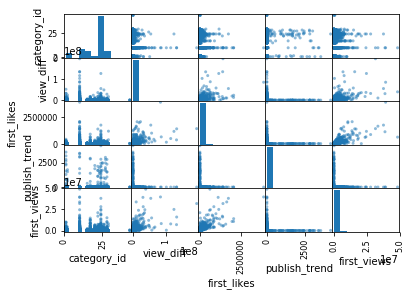

In [15]:
plt.figure(figsize = [10, 10])
df1 = td[['category_id','view_diff','first_likes','publish_trend','first_views']]
pd.plotting.scatter_matrix(df1)
f4 = plt.gcf()


## Data Visualization


In [16]:
# Plotring process the Heatmaps of Correlation
# only picking up these variables to find the correlations
# picking up four columns including "likes", "dislikes", "views" and "comment number" as variables

# The mattrix of correlation
new_cols = ['likes','dislikes', 'views', 'comment_count']
corr_matrix = df[new_cols].corr()
corr_matrix

,likes,dislikes,views,comment_count
likes,1.000000,0.447186,0.849177,0.803057
dislikes,0.447186,1.000000,0.472213,0.700184
views,0.849177,0.472213,1.000000,0.617621
comment_count,0.803057,0.700184,0.617621,1.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

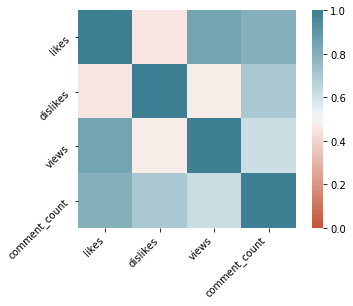

In [17]:
# Plot Heatmap

fig, ax = plt.subplots()
ax = sns.heatmap(corr_matrix, vmin=0, vmax=1, center=0.5, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right');
plt.plot

### Relationship between categories and different variables

Text(0.5, 1.0, 'The Number of Videos in Different Categories')

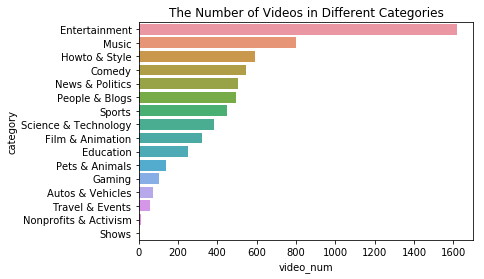

In [18]:
# an overview between number of videos and category
#first we get the number of videos in different categories by using 'groupby' function
video_num = last_occ.groupby('category')['video_id'].agg('count')
video_num = video_num.sort_values(ascending=False)
video_num = video_num.reset_index()
video_num.columns = ['category','video_num']
# use 'barplot' in seaborn to get the plot
# x axis means the number of videos
# y axis means categories
sns.barplot(x="video_num", y="category", data = video_num)
plt.plot
plt.title("The Number of Videos in Different Categories")

In [19]:
# Plotring process the Heatmaps of Correlation
# only picking up these variables to find the correlations
# picking up four columns including "likes", "dislikes", "views" and "comment number" as variables

# The mattrix of correlation
new_cols = ['likes','dislikes', 'views', 'comment_count']
corr_matrix = last_occ[new_cols].corr()
corr_matrix

,likes,dislikes,views,comment_count
likes,1.000000,0.420619,0.834639,0.765288
dislikes,0.420619,1.000000,0.441923,0.734943
views,0.834639,0.441923,1.000000,0.573885
comment_count,0.765288,0.734943,0.573885,1.000000


In [20]:
# Average of view count of each type
# IF there data does not exist for type of video, we use 0

average = [0]*40
for index in range(40):
    newone = last_occ[last_occ['category_id']==index]
    average[index] = (newone['views'].mean())
    if math.isnan(average[index]):
        average[index]= 0
        
# Create x y values for prediction

X= []
y = []
count = 0
for i in average:
    X.append([count])
    y.append(i)
    count = count+1

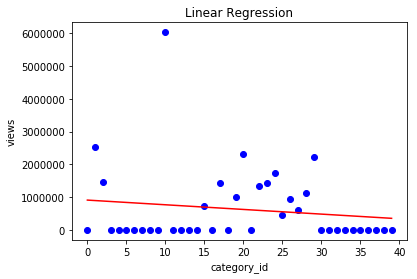

In [21]:
# Linear Regression of category and view count, which shows that if the category_id is smaller, it tends to have a 
#better view counts. 

lin = LinearRegression()   
lin.fit(X, average)
plt.scatter(X, average, color = 'blue') 
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('category_id') 
plt.ylabel('views') 
  
plt.show()

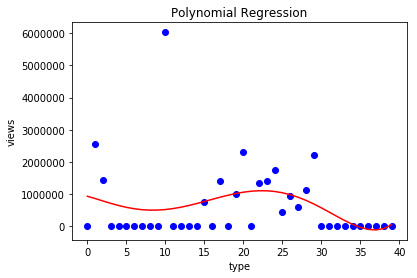

In [22]:
# Polynomial Regression of category and view count

poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, average) 
lin2 = LinearRegression() 
lin2.fit(X_poly,average)

# Plot polynomial regression

plt.scatter(X,average, color = 'blue') 
plt.plot(X,lin2.predict(poly.fit_transform(X)),color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('type') 
plt.ylabel('views') 
  
plt.show()

Text(0.5, 1.0, 'Like_view Ratio in Different categories')

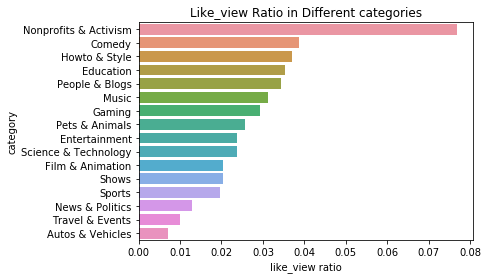

In [23]:
# some data analysis divided by category

# compute the number of views in different category
# compute the number of likes in different category
# compute the number of dislikes in different category
# use "group by" and the method of counting is 'sum'

view_count = last_occ.groupby('category')['views'].agg('sum')
like_count = last_occ.groupby('category')['likes'].agg('sum')
dislike_count = last_occ.groupby('category')['dislikes'].agg('sum')

# Likes & View Count
# Plot the ratio between likes and view in different categories

# count the ratio
view_like_ratio = like_count / view_count
# sort them and reset index
view_like_ratio = view_like_ratio.sort_values(ascending=False)
view_like_ratio = view_like_ratio.reset_index()
# name the new columns
view_like_ratio.columns = ['category','like_view ratio']
sns.barplot(x="like_view ratio", y="category", data=view_like_ratio)
plt.plot
plt.title("Like_view Ratio in Different categories")

Text(0.5, 1.0, 'Dislike_view Ratio in Different categories')

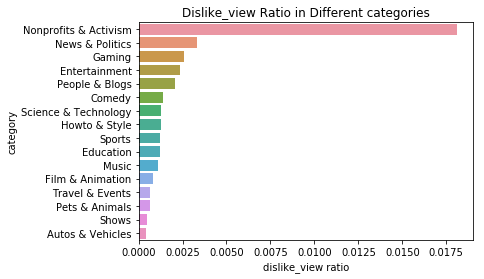

In [24]:
# Dislike & View Count
# Plot the ratio between dislikes and view in different categories

# count the ratio
view_dislike_ratio = dislike_count / view_count
# sort them and reset index
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False)
view_dislike_ratio = view_dislike_ratio.reset_index()
# name the new columns
view_dislike_ratio.columns = ['category','dislike_view ratio']
sns.barplot(x="dislike_view ratio", y="category", data=view_dislike_ratio)
plt.plot
plt.title("Dislike_view Ratio in Different categories")

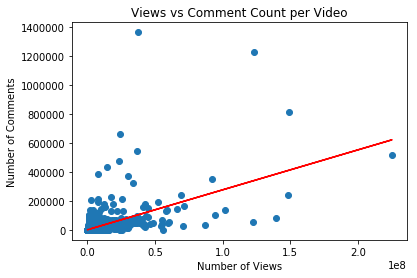

In [25]:
# Scatter Plot
# Views vs Comment Count

#Setting up variables using the "Views" and "Comment Count" columns from data
views = last_occ['views']
comments =last_occ['comment_count']
X = []
for index in views:
    X.append([index])

#Plot Views vs Comment Count
plt.scatter(views,comments)

#Labelling the axes and title
plt.xlabel('Number of Views')
plt.ylabel('Number of Comments')
plt.title('Views vs Comment Count per Video')

#Plotting the linear regression of the overall graph
lin = LinearRegression()
lin.fit(X, comments)
plt.plot(X, lin.predict(X), color = 'red')

it can be seen that most videos that have a lot of commets tend to have a fewer amount of views. 

### Channel titles vs. View counts

Here, we would like to invesgate the assoiciation between channel title and view counts. Thus, we first groupby channel title, count the sum of view counts and list in descending order.

In [26]:
copy = last_occ.copy()
grouped = copy.groupby('channel_title').views.sum().sort_values(ascending = False).to_frame().reset_index()
top_100_df = grouped[:100]

Text(0.5, 1.0, 'Distribution of Number of View Counts')

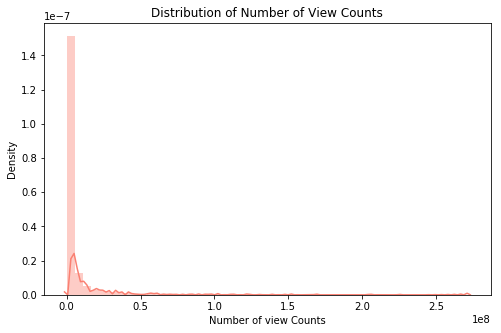

In [27]:
#distribution of view count, all channels
plt.rcParams['figure.figsize'] = [8, 5]
ax = sns.distplot(grouped[pd.notnull(grouped['views'])]['views'], rug=False, hist=True, hist_kws={'density': True, 'normed': None}, color = 'salmon')
ax.set_xlabel('Number of view Counts')
ax.set_ylabel('Density')
ax.set_title('Distribution of Number of View Counts')

The above plot is the distribution of view counts by all groups. Since there are more than 2000 groups, the top ones have significant numbers of view counts while the data is very right-skewed, we decide to take the top 100 most-viewed channel.

Taking a closer look at the top 100 most-viewed channels


Text(0.5, 1.0, 'Distribution of Number of View Counts for the top 100 most-viewed Channels')

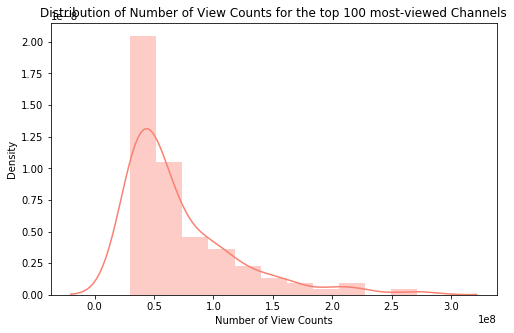

In [28]:
#Distribution of view counts, top 100 channels
print('Taking a closer look at the top 100 most-viewed channels')
plt.rcParams['figure.figsize'] = [8, 5]
ax = sns.distplot(top_100_df[pd.notnull(top_100_df['views'])]['views'], rug=False, hist=True, hist_kws={'density': True, 'normed': None}, color = 'salmon')
ax.set_xlabel('Number of View Counts')
ax.set_ylabel('Density')
ax.set_title('Distribution of Number of View Counts for the top 100 most-viewed Channels')

The above plot is the distribution of view counts by top 100 groups. We can see that the plot is still right-skewed but much better than the one before.

In [29]:
with_mean = copy.groupby('channel_title').views.mean().sort_values(ascending = False).to_frame().reset_index()[:100]
with_mean = with_mean.rename(columns={'views': 'mean_view'})
with_mean.head()

,channel_title,mean_view
0,ChildishGambinoVEVO,225211923.0
1,BeckyGVEVO,139334502.0
2,TheWeekndVEVO,122544931.0
3,LuisFonsiVEVO,102012605.0
4,MalumaVEVO,73570842.0


Text(0.5, 1.0, 'Distribution of Mean View Counts for the top 100 most-viewed Channels')

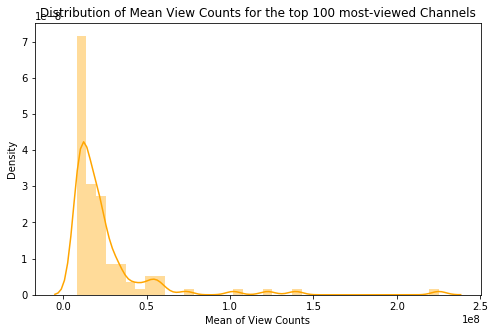

In [30]:
#Distribution of mean view counts, top 100 channels
plt.rcParams['figure.figsize'] = [8, 5]
ax = sns.distplot(with_mean[pd.notnull(with_mean['mean_view'])]['mean_view'], rug=False, hist=True, hist_kws={'density': True, 'normed': None}, color = 'orange')
ax.set_xlabel('Mean of View Counts')
ax.set_ylabel('Density')
ax.set_title('Distribution of Mean View Counts for the top 100 most-viewed Channels')

Text(0.5, 1.0, 'Mean View Counts of the Top 100 Most-Viewed Channels')

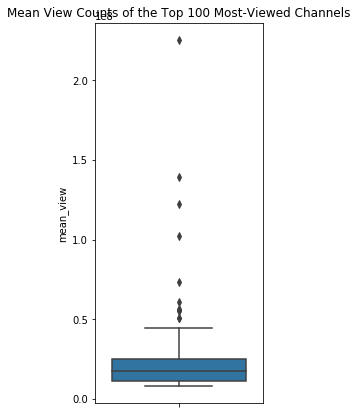

In [31]:
#box plot of mean view counts, top 100 channels
plt.rcParams['figure.figsize'] = [3, 7]
ax = sns.boxplot(data=with_mean, y = 'mean_view')
ax.set_title('Mean View Counts of the Top 100 Most-Viewed Channels')

This is the box plot of mean view counts for the top 100 channels. The max point is at the very top of the plot which can be seen as an outlier, and the median falls at the bottom in between first and third quantile. We can still see that the majority are those with relatively smaller mean view counts.

Text(0, 0.5, 'Name of Channels')

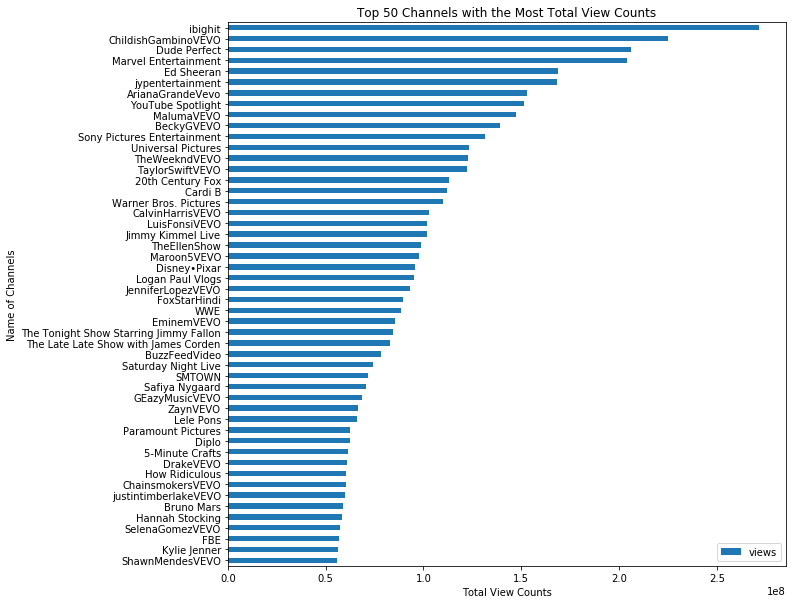

In [32]:
#barh plot of view counts, top 50 channels
plt.rcParams['figure.figsize'] = [10, 10]
top_100_df[:50].sort_values(by = 'views').set_index('channel_title').plot(kind='barh', title = 'Top 50 Channels with the Most Total View Counts')
plt.xlabel('Total View Counts')
plt.ylabel('Name of Channels')

Text(0, 0.5, 'Name of Channels')

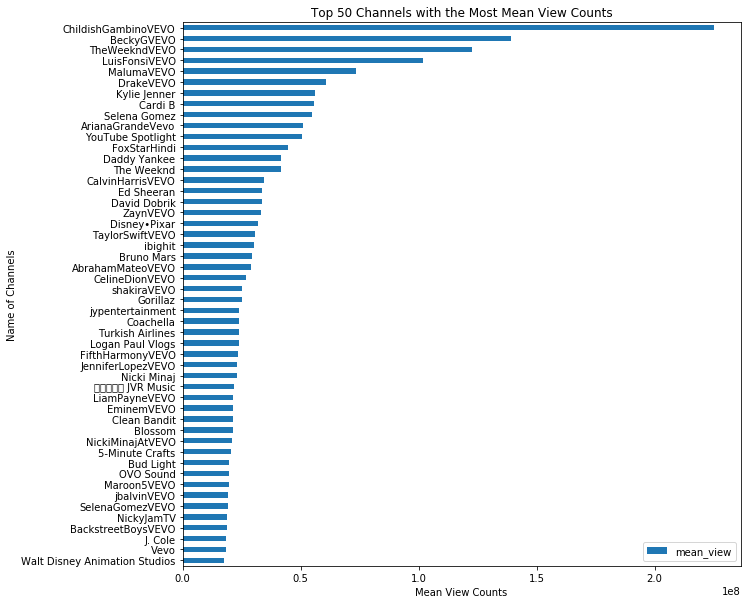

In [33]:
#bar plot of mean view counts, top 50 channels
plt.rcParams['figure.figsize'] = [10, 10]
with_mean[:50].sort_values(by = 'mean_view').set_index('channel_title').plot(kind='barh', title = 'Top 50 Channels with the Most Mean View Counts')
plt.xlabel('Mean View Counts')
plt.ylabel('Name of Channels')

### Trending duration vs. change in view counts 

We are trying to see the relationship between trending duration and view counts. Since this dataframe contains multiple trending days for each video, we decided to use the last day of trending to avoid conflicts and confusion. In the following codes, we created a new dataframe without some unecessary rows that contains different trending days of a video. We also reformatted the columns of publish time and trending date because we need to calculate the difference between two. Then, We inserted a new column that called "publish_to_trend_duration" that contains trending durations

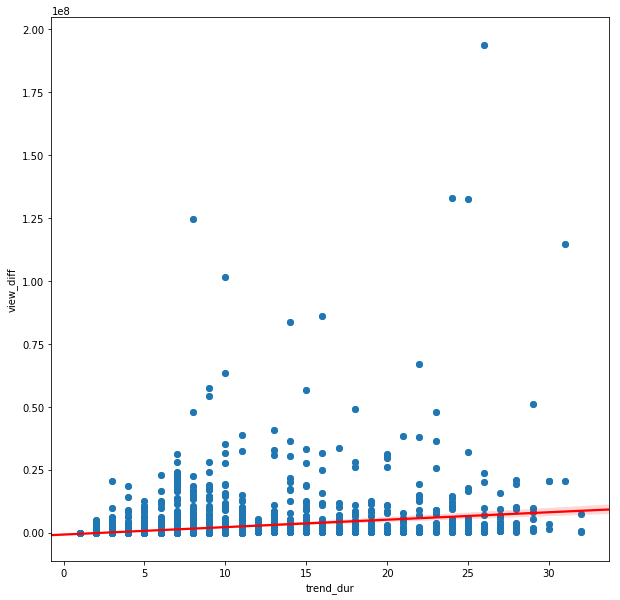

In [34]:
plt.xlabel('trending duration')
plt.ylabel('change in views')
plt.scatter(td['trend_dur'],td['view_diff'])

sns.regplot(x='trend_dur', y='view_diff', data=td, line_kws={'color':'red'})

<BarContainer object of 6346 artists>

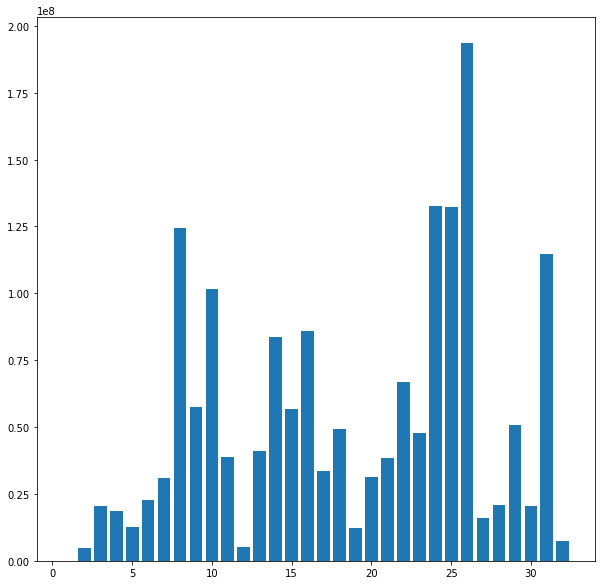

In [35]:
plt.bar(td['trend_dur'],td['view_diff'])


## Data Analysis and Results



In [62]:
copy = df.copy()

In [63]:
#add in like and dislike ratio into dataframe
copy['like_dislike_ratio'] = copy['likes'] / copy['dislikes']

In [64]:
#create first occurrence and last occrrence dataframes
first_occ = copy.sort_values('trending_date').drop_duplicates(subset = ['video_id'], keep = 'first')
last_occ = copy.sort_values('trending_date').drop_duplicates(subset = ['video_id'], keep = 'last')

Right now, the view count column has too many various view counts which will make prediction even harder, so we decided to replace the number with its corresponding quantile (ranging from min view counts to max view counts, 10 in total).

In [65]:
first_occ['view_count_range'] = pd.qcut(first_occ.views,10, labels=False)
last_occ['view_count_range'] = pd.qcut(last_occ.views,10, labels=False)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [67]:
#X being the selected feature used to predict as y being the predicted result
X = first_occ[['channel_title','like_dislike_ratio','category_id', 'comment_count']]
y = first_occ['view_count_range']

In [68]:
#preprocessing / one hot encoder
cat_feat = ['category_id']
channel_feat = ['channel_title']
cat_trans = Pipeline(steps=[('cat_trans', OneHotEncoder(handle_unknown = 'ignore'))])
channel_trans = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),
    ('channel_trans', OneHotEncoder(handle_unknown = 'ignore'))])
pre = ColumnTransformer(transformers=[('cat', cat_trans,cat_feat),
                                      ('channel', channel_trans, channel_feat)])

In [69]:
#fit the model
from sklearn.preprocessing import StandardScaler
clf = RandomForestClassifier()
pl = Pipeline(steps=[('preprocessor', pre),
            ('clf', clf)
        ])
pl.fit(X , y)

/Users/tyy/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('cat_trans', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float6...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [70]:
y_pre = pl.predict(X)

Text(0.5, 1.0, 'Predicted view count range vs. the original')

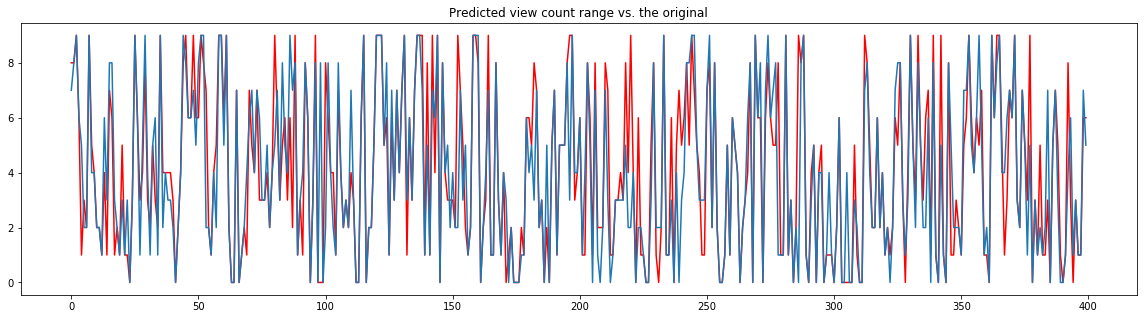

In [71]:
plt.figure(figsize = [20, 5]);
plt.plot(y_pre[:400],color = 'r')
plt.plot(y.values[:400])
plt.title("Predicted view count range vs. the original for first occurrence")

In [72]:
X = last_occ[['channel_title','like_dislike_ratio','category_id', 'comment_count']]
y = last_occ['view_count_range']
cat_feat = ['category_id']
channel_feat = ['channel_title']
cat_trans = Pipeline(steps=[('cat_trans', OneHotEncoder(handle_unknown = 'ignore'))])
channel_trans = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),
    ('channel_trans', OneHotEncoder(handle_unknown = 'ignore'))])
pre = ColumnTransformer(transformers=[('cat', cat_trans,cat_feat),
                                      ('channel', channel_trans, channel_feat)])
clf = RandomForestClassifier()
pl = Pipeline(steps=[('preprocessor', pre),
            ('clf', clf)
        ])
pl.fit(X , y)

/Users/tyy/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('cat_trans', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float6...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [73]:
y_pre = pl.predict(X)

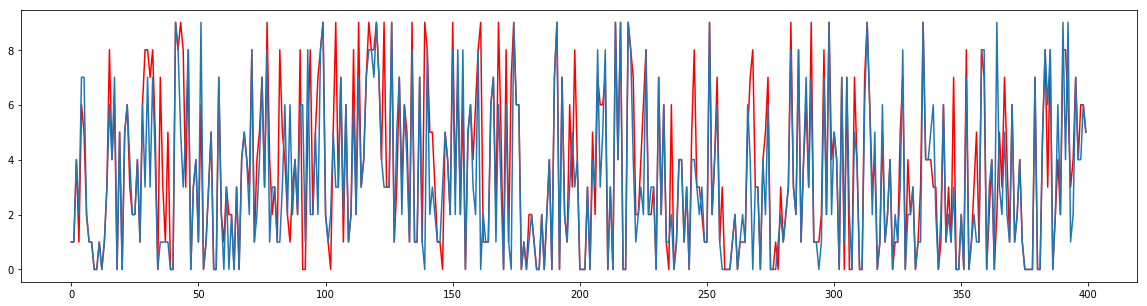

In [58]:
plt.figure(figsize = [20, 5]);
plt.plot(y_pre[:400],color = 'r')
plt.plot(y.values[:400])
plt.title('Predicted view count range vs. the original view count for last Occurrence')

With the four selected features, channel_title,like_dislike_ratio,category_id and comment_count, we used the model of randomforest to predict the view count ranges for the first occurrence dataframe and last occurrence dataframe. The prediction result is graphed in the above plots respectively with red curves as the predicted and blue ones as the original. We notice that there are more parts of the red curve not aligning the blue curve in the first graph than that in the the second graph. Thus, the model didn't fit as well for the first_occ as for the last_occ. Nevertheless, the matching was considerable for the last occurance graph, meaning the features we selected are important factors for trending videos. Having this prediction overview, we then take a closer look at how category alone will predict trending. 

In [40]:
outcome_1, predictors_1 = patsy.dmatrices("first_views ~category",td)
# YOUR CODE HERE
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# YOUR CODE HERE
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            first_views   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.89
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.51e-29
Time:                        17:23:57   Log-Likelihood:            -1.0076e+05
No. Observations:                6346   AIC:                         2.016e+05
Df Residuals:                    6330   BIC:                         2.017e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [48]:
outcome_1, predictors_1 = patsy.dmatrices("last_views ~category",td)
# YOUR CODE HERE
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# YOUR CODE HERE
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             last_views   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     23.55
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.66e-64
Time:                        17:33:29   Log-Likelihood:            -1.0891e+05
No. Observations:                6346   AIC:                         2.179e+05
Df Residuals:                    6330   BIC:                         2.180e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc


The dataset we have here includes videos that are already trending only along with vital information about them such as the view counts, likes, dislikes, and comment counts. Out of the given information we have created a dataframe for our data analysis.

Here we are determining a relationship between the category of the video and its view count when it first trended. In doing so, we see that Music and Gaming videos tend to affect the outcome more than other categories of videos. This is seen here as both Music and Gaming have p-values less than 0.01 and as a result we fail to reject the null hypothesis. As such, these two categories have a significant impact on the view count when a video first trends.

However, as time goes on, the category of Music continues to retain its view count and trending status whereas the Gaming category tends to fall back in comparison. 

In [47]:
outcome_3, predictors_3 = patsy.dmatrices("last_views ~category + first_engagement ",td)
# YOUR CODE HERE
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

# YOUR CODE HERE
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:             last_views   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     23.27
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.04e-67
Time:                        17:33:17   Log-Likelihood:            -1.0890e+05
No. Observations:                6346   AIC:                         2.178e+05
Df Residuals:                    6329   BIC:                         2.180e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

The first engagement is shown to have an effect on the last views that at video within a category recieves towards the end of its trending period. 


## Privacy/Ethical Considerations


The dataset was taken online through kaggle, an open public community for data scientists and machine learning purposes. Given this, we have the permission to use the whole dataset for exploring and studying and thus there should not be much if any privacy concerns regarding the dataset as there is no personal information regarding the youtuber written in the datasets.
One thing to consider is that our data might not be entirely objective as Youtube has its own way of deciding whether the video is trending or not. We cannot  say with certainty that YouTube’s algorithm that determines Trending videos is not influenced by their views and policies. However, we are working with a dataset that contains only the Trending videos. We do acknowledge that the dataset may be biased in those regards.
The other potential bias that we faced when researching and analysing the datasets was that some countries are excluded (such as China and North Korea) because YouTube cannot be used in those countries. We decided that one way to overcome this obstacle was to limit our project to just videos in the United States. This allowed us to explore what categorical factors were more influential and relevant within the US.
Further on the issue of privacy, the dataset we use does not include private information on people who are involved with the videos. While we cannot say the same about the content of the actual videos, we did not find any data or metadata that violates people’s privacy.


## Conclusion and Discussion

### Conclusion  

In order to test our research question to see which different aspects of Youtube contribute and define a successful trending Youtube video, we began to test these different aspects against each other so to compare which contributed more or less. We did this by using a public dataframe and dropping some unnecessary columns so to focus our tests on the categories, likes, dislikes, views, and comment count. After running some of these tests, we came to also focusing a bit more on the first views of the videos vs the last views as well as the first user engagement and its input on both of these elements. 

In data visualization, we found out the most popular videos are always music videos, while the videos with most like-view ratio and most dislike-view ratio are both nonprofits/Activism videos. This could be an indicator as to each Youtube element’s relevance to genuinely contributing to the defining of a successful trending video. 

By looking at the view vs the comment count per each video, a scatterplot was utilized in order to see if this particular ratio is able to provide information as to whether comments may contribute to a video trending. From this graph it can be seen that most videos that have a lot of comments tend to have a fewer amount of views. Videos that have many more views still have a considerable amount of comments but not nearly as much as those with fewer views. Although the linear regression line shows that on average, there is a slight correlation between the amount of views that a video may get vs. the amount of comments it receives, it can't be said for certain that the amount of comments a video gets contributes to whether the video trends or not.

We used the regression model to predict the relationship between the view count when the video is trending at the first time and category of that video. In doing so, we see that Music and Gaming videos tend to affect the outcome more than other categories of videos. Then we used another regression model to find out the relationship between view count when it is not trending anymore versus the category of that video. In doing so, we find the last views is not that related to the category of the video except music videos. 

Thus, if the video is in music or gaming category, the first view count is highly related to the category. In other words, the category will effects the first views strongly, which means the first impression of that video.

However, the video itself (like_count, comment_count) is going to impact the last_views. In other words, if the video is a good-quality video, the last_views is going to be high. And the category is not going to impact last_views that much like the first_views. 

In exploring the various aspects of views, comments, likes, dislikes, categories, etc., it can be concluded that the most influential elements that define a successful trending Youtube video in the US would be the number of views a video receives as well as the category that the video itself is posted in. However, this does not mean that the amount of comments, likes, and dislikes does not contribute. Considering that these three elements are in fact the definition of the "first engagement" of a video, these factors while they don't necessarily define a successful video, help the video remain relevant and trending longer.  

### Discussion
Limitations of analysis discussed
Looking at the visualization of trending duration and change in view counts, we found that there are some negative view counts on certain Youtube videos. As we listed all of the abnormal view counts in specific time frame, we observed two major problems in this dataset. When an original video is deleted, another video would upload with the same video id. Another problem is a bug from Youtube that causes sudden drop of view counts. According to Brahma It Solutions website, YouTube had a data reporting error that caused a lot of extra views to show up on videos and some video views disappearing from 200 to 50,000 views. If there are a lot of accounts from strange user agents, Youtube would assume that they are bots. Thus, we decided to delete those entries with deleted videos and negative view counts to normalize our data.
https://brahmaitsolutions.com/my-youtube-video-views-suddenly-dropped/
Future Work
Some of the drawbacks of our analysis are that our dataset from kaggle is in particular time frame excluding the information of non-trending videos. It’s impossible to demonstrate the actual and complete trending phenomenon of Youtube videos. Therefore we think our dataset is biased. We need to use a larger dataset that contains the data from all videos in longer period of time. Moreover, we can predict the performance of specific videos even channels by using some machine learning methods. 
As well, our work may also be a stepping stone into considering more specific reasoning as to why music videos may continue to trend over time while gaming videos tend to lose its trending status. An idea could be the amount of times a gaming channel uploads which naturally causes another trending gaming video to lose its traction. Whereas, since many people that look for music videos tend to continue to search up those particular videos and songs, this could potentially be an answer as to why it continues to trend. However, with the setbacks of our data not containing this information as well as this spans further than the limitations of the project, this idea could potentially be looked upon in the future. 